Bagian 1: K-Means Clustering 

In [1]:
# Persiapan data
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

In [2]:
import os
# Construct the path to the data folder
file_path = os.path.join(os.pardir, 'data', 'Mall_Customers.csv')

# Load the dataset
df = pd.read_csv(file_path)

# Display the first few rows
df.head()


,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


2. Tentukan fitur apa yang tepat untuk melakukan clustering (minimal 2) dan buat model K-Means dengan mempertimbangkn jumlah k yang terbaik

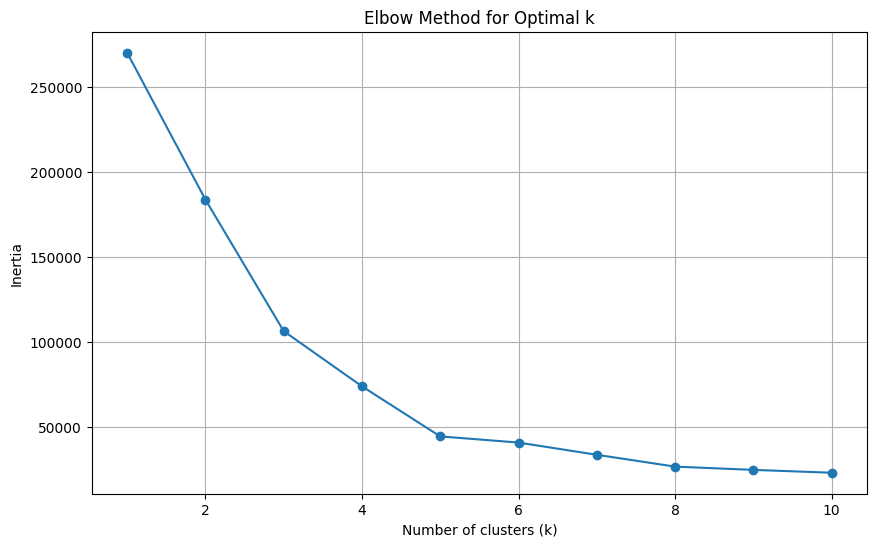

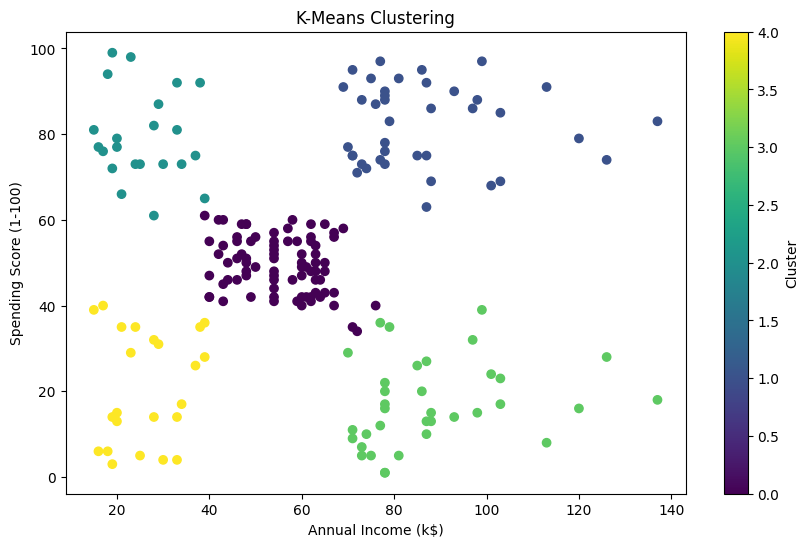

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import os

# Construct the path to the data folder
file_path = os.path.join(os.pardir, 'data', 'Mall_Customers.csv')

# Load the dataset
df = pd.read_csv(file_path)

# Menentukan fitur untuk clustering
features = df[['Annual Income (k$)', 'Spending Score (1-100)']]

# Menentukan jumlah kluster yang optimal menggunakan Elbow Method
inertia = []
k_values = range(1, 11)

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(features)
    inertia.append(kmeans.inertia_)

# Plot Elbow Method
plt.figure(figsize=(10, 6))
plt.plot(k_values, inertia, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia')
plt.grid()
plt.show()

# Membuat model K-Means dengan k optimal (misalkan k = 5)
k_optimal = 5
kmeans = KMeans(n_clusters=k_optimal, random_state=42)
clusters = kmeans.fit_predict(features)

# Tambahkan kolom cluster ke data asli
df['Cluster'] = clusters

# Tampilkan hasil
plt.figure(figsize=(10, 6))
plt.scatter(df['Annual Income (k$)'], df['Spending Score (1-100)'], c=df['Cluster'], cmap='viridis')
plt.title('K-Means Clustering')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.colorbar(label='Cluster')
plt.show()


3. Buatlah implementasi model SOM untuk segmentasi citra lain

Menggunakan 3 channel RGB

Original Image shape: (499, 500, 4)
Image shape after removing alpha channel: (499, 500, 3)
Training SOM...


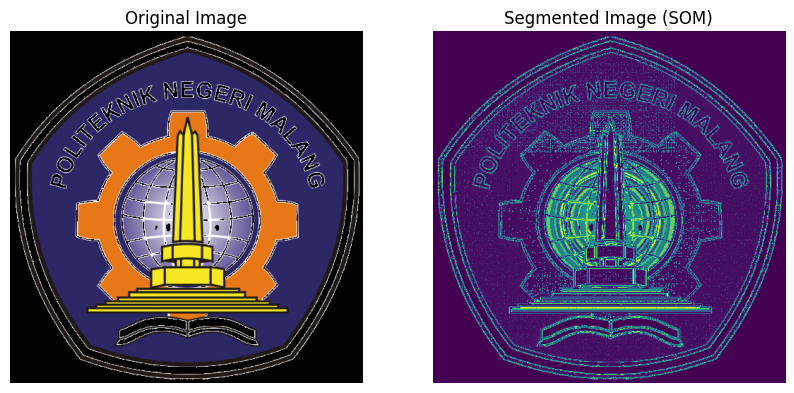

In [13]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from minisom import MiniSom
from skimage import io

# Load the image (replace with your image path)
image_path = r'C:\Python312\Lib\kuliah_machine_learning\Machine-Learning\data\logo_polinema.png'
image = io.imread(image_path)

# Check the shape of the image
print(f'Original Image shape: {image.shape}')

# If the image has 4 channels (RGBA), remove the alpha channel
if image.shape[2] == 4:
    image = image[:, :, :3]  # Keep only the first 3 channels (RGB)

print(f'Image shape after removing alpha channel: {image.shape}')

# Reshape image into a 2D array (pixels as rows, RGB as columns)
pixels = image.reshape(-1, 3)

# Normalize the pixel values (optional but recommended for SOM)
scaler = StandardScaler()
pixels_normalized = scaler.fit_transform(pixels)

# Define SOM dimensions (you can adjust this depending on the image size)
som_width, som_height = 20, 20  # Adjust as needed
som = MiniSom(x=som_width, y=som_height, input_len=3, sigma=1.0, learning_rate=0.5)

# Initialize SOM weights randomly and train
som.random_weights_init(pixels_normalized)
print("Training SOM...")
som.train_random(pixels_normalized, 1000)  # Training with 1000 iterations

# Assign each pixel to the closest SOM neuron (i.e., clustering pixels)
clusters = np.zeros((pixels.shape[0],), dtype=int)
for i, pixel in enumerate(pixels_normalized):
    w = som.winner(pixel)  # Find the winning neuron for each pixel
    clusters[i] = w[0] * som_height + w[1]  # Convert 2D neuron coordinates to a unique cluster label

# Reshape the clusters back to the original image shape
segmented_image = clusters.reshape(image.shape[0], image.shape[1])

# Plot original and segmented images
plt.figure(figsize=(10, 5))

# Original image
plt.subplot(1, 2, 1)
plt.imshow(image)
plt.title('Original Image')
plt.axis('off')

# Segmented image
plt.subplot(1, 2, 2)
plt.imshow(segmented_image, cmap='viridis')
plt.title('Segmented Image (SOM)')
plt.axis('off')

plt.show()


Menggunakan keempat channel (RGB + alpha)

Original Image shape: (499, 500, 4)
Reshaped and normalized pixel data shape: (249500, 4)
Training SOM...


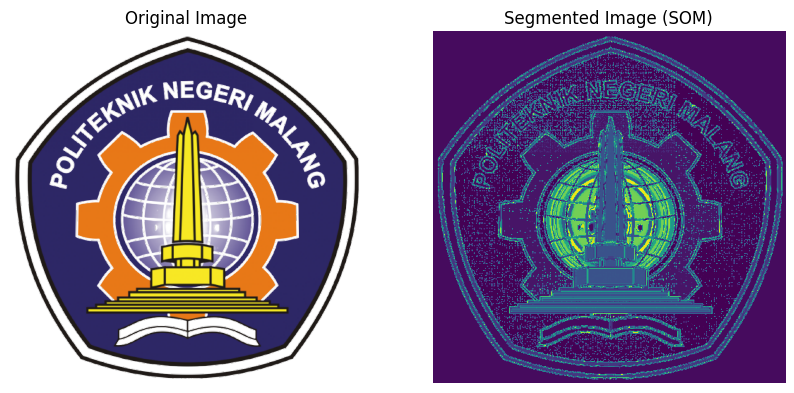

In [16]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from skimage import io
from minisom import MiniSom  # Make sure you have installed MiniSom

# Load the image (update the file path)
image_path = r'C:\Python312\Lib\kuliah_machine_learning\Machine-Learning\data\logo_polinema.png'
image = io.imread(image_path)

# Check the shape of the image
print(f'Original Image shape: {image.shape}')

# If the image has 4 channels (RGBA), keep all channels
if image.shape[2] == 4:
    pixels = image.reshape(-1, 4)  # Reshape into (number of pixels, 4)
else:
    print("Image does not have 4 channels, exiting.")
    exit()

# Normalize the pixel values
scaler = StandardScaler()
pixels_normalized = scaler.fit_transform(pixels)

print(f'Reshaped and normalized pixel data shape: {pixels_normalized.shape}')

# Define SOM dimensions (you can adjust this depending on the image size)
som_width, som_height = 20, 20  # Adjust as needed
som = MiniSom(x=som_width, y=som_height, input_len=4, sigma=1.0, learning_rate=0.5)  # input_len=4 for RGBA

# Initialize SOM weights randomly and train
som.random_weights_init(pixels_normalized)
print("Training SOM...")
som.train_random(pixels_normalized, 1000)  # Training with 1000 iterations

# Assign each pixel to the closest SOM neuron (i.e., clustering pixels)
clusters = np.zeros((pixels.shape[0],), dtype=int)
for i, pixel in enumerate(pixels_normalized):
    w = som.winner(pixel)  # Find the winning neuron for each pixel
    clusters[i] = w[0] * som_height + w[1]  # Convert 2D neuron coordinates to a unique cluster label

# Reshape the clusters back to the original image shape
segmented_image = clusters.reshape(image.shape[0], image.shape[1])

# Plot original and segmented images
plt.figure(figsize=(10, 5))

# Original image
plt.subplot(1, 2, 1)
plt.imshow(image)
plt.title('Original Image')
plt.axis('off')

# Segmented image
plt.subplot(1, 2, 2)
plt.imshow(segmented_image, cmap='viridis')
plt.title('Segmented Image (SOM)')
plt.axis('off')

plt.show()
